In [1]:
import pandas as pd

In [4]:
data=pd.read_csv("data/amala_trends_20250617.csv")

In [6]:
data.head()

,date,Amala
0,2020-06-14,32
1,2020-06-21,29
2,2020-06-28,27
3,2020-07-05,25
4,2020-07-12,35


## Trendiness Score Calculation

Design using:

   *  Velocity = rate of change

   *  Acceleration = change in velocity

   *  Volatility = variability

<Axes: title={'center': 'Trendiness Score Over Time'}>

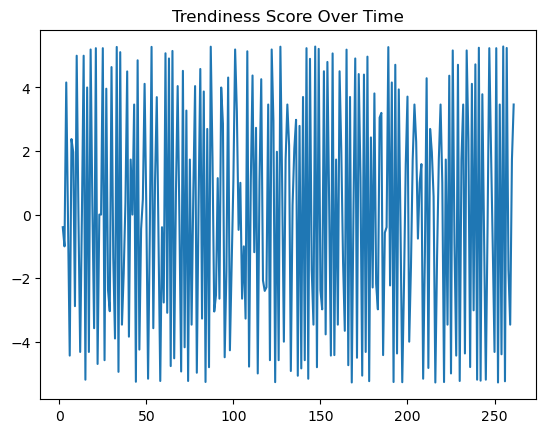

In [7]:
import numpy as np

def compute_trend_scores(df):
    velocity = df.diff()
    acceleration = velocity.diff()
    volatility = df.rolling(window=3).std()

    trendiness = (velocity + acceleration) / (volatility + 1e-9)
    return trendiness

trend_scores = compute_trend_scores(data["Amala"])
trend_scores.plot(title='Trendiness Score Over Time')


## Statistical Visualization (Z-score, Rolling Mean)

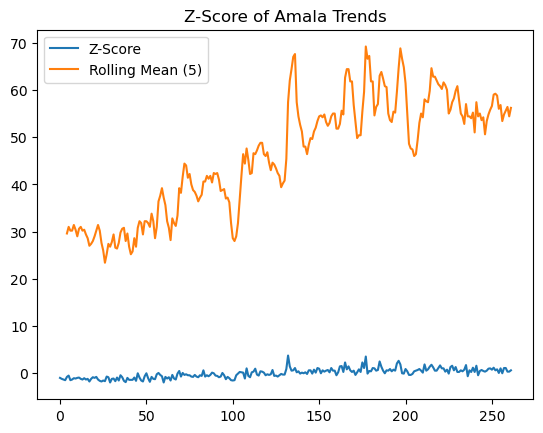

In [10]:
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Compute z-score of the "Amala" column
z_scores = pd.Series(zscore(data["Amala"]), index=data.index)

# Compute rolling mean (optional)
rolling_mean = data["Amala"].rolling(window=5).mean()

# Plotting
z_scores.plot(title="Z-Score of Amala Trends", label="Z-Score", legend=True)
rolling_mean.plot(label="Rolling Mean (5)", legend=True)
plt.show()

